# Load the data

In [1]:
import pandas as pd

completed_deals = pd.read_csv('data/completed-or-current-deails-2019-10-29.csv')
lost_deals = pd.read_csv('data/lost-deals-2019-10-28-1.csv')

completed_deals['Deal Stage'] = 1
lost_deals['Deal Stage'] = 0


Deal ID                                          Deal Name  \
0    1126055965                  American Family Insurance - Shark   
1     362032710                                                SSE   
2     941965426                              Confluency - X Factor   
3     905986805  Reverb - Holistic On-boarding/Training/Mentor ...   
4     876852247                Maintenance and Consulting Services   
..          ...                                                ...   
415   262701352                                      TheSocReports   
416   262701348                                        ERP Advisor   
417   262701305                             Assessment and Roadmap   
418   262701303                  Support Center Production Rollout   
419   262701283                           Uptake Technologies_2017   

         Deal owner  Deal Stage      Sales Lead Designated Office  \
0    Kevin Kotowski           1    Dennis Moore           Madison   
1         Jim Suchy          

# Concatenate lost and completed deals into 1 dataframe

In [57]:
deals_df = pd.concat([completed_deals, lost_deals], sort=False)

deals_df.tail()

,Deal ID,Deal Name,Deal owner,Deal Stage,Sales Lead,Designated Office,Director,Industry,Source,Associated Company ID,Associated Company,Associated Contact IDs,Associated Contacts,Business Lines
996,262701285,Crown Imports - Clone,Margaret Pagel,0,Paul Pagel,NaN,Doug Bradbury,NaN,NaN,701392159,Crown Imports,"215001, 215501","Mike Messina, Celine Kosian",Managed Services
997,262701284,IDEO - BMO - Plan B auth,Paul Pagel,0,Paul Pagel,Chicago,Gustin Prudner (Deactivated User),NaN,NaN,"726952002, 726952210","BMO Harris, Ascensia",NaN,NaN,Product Design and Delivery
998,262701281,Follett School Solutions,Margaret Pagel,0,NaN,NaN,NaN,NaN,NaN,727321304,Follett School Solutions,369625,"Welsh, Patrick",NaN
999,262701280,UBS,Margaret Pagel,0,Margaret Pagel,Chicago,NaN,NaN,NaN,727079967,UBS/ Tim Ryan,NaN,NaN,NaN
1000,262701271,Submarine Quest,Jim Suchy,0,NaN,London,Jim Suchy,NaN,NaN,726952036,Enigma Quests,NaN,NaN,Consulting


In [58]:
deals_df['Deal owner'].value_counts()

Margaret Pagel                          509
Jim Suchy                               130
Paul Pagel                              104
Jordan Koczot                            94
Doug Bradbury                            71
Dave Moore                               68
Ray Hightower (Deactivated User)         67
Ryan Verner                              54
Malcolm Newsome                          49
Kim Carten                               41
Gustin Prudner (Deactivated User)        31
Kevin Kotowski                           25
Jim Remsik (Deactivated User)            20
Connor Mendenhall (Deactivated User)     18
Sarah Sunday                             15
Dennis Moore                             13
Gary Gentry (Deactivated User)           11
Brad Ediger                              10
heather corallo                           8
Connor Mendenhall                         7
Becca Townsend                            5
Colin Jones                               4
Joseph Brown                    

# Filter out outlayers

In [60]:
is_not_Margaret = ~(deals_df['Deal owner']=='Margaret Pagel')
deals_df = deals_df[is_not_Margaret]

deals_df.count()

Deal ID                   912
Deal Name                 912
Deal owner                856
Deal Stage                912
Sales Lead                588
Designated Office         722
Director                  668
Industry                  287
Source                    327
Associated Company ID     880
Associated Company        880
Associated Contact IDs    427
Associated Contacts       425
Business Lines            534
dtype: int64

## And some empty data cleanup

In [61]:
df = deals_df[['Industry', 'Designated Office', 'Source', 'Deal owner', 'Deal Stage']].copy()

In [63]:
is_not_empty_industry = ~df['Industry'].isnull()

df = df[is_not_empty_industry]

df['Deal Stage'].value_counts()

0    164
1    123
Name: Deal Stage, dtype: int64

In [ ]:
is_not_empty_office = ~df['Designated Office'].isnull()

df = df[is_not_empty_office]

df['Deal Stage'].value_counts()

# Factorizing features

In [64]:
df['Industry'] = df['Industry'].factorize()[0]
df['Source'] = df['Source'].factorize()[0]
df['Designated Office'] = df['Designated Office'].factorize()[0]
df['Sales Lead'] = df['Sales Lead'].factorize()[0]

df.count()

Industry             287
Designated Office    287
Source               287
Sales Lead           287
Deal Stage           287
dtype: int64

# Draw correlation

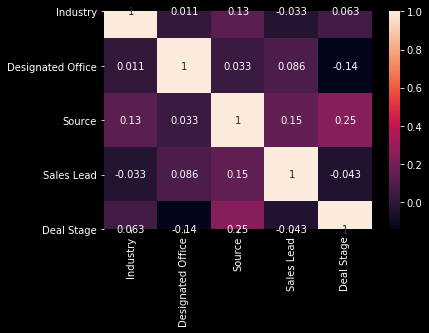

In [65]:
correlation = df.corr()

import seaborn as sn

sn.heatmap(correlation, annot=True)